# Diabetes Care
### Chenxue Hou
### Oct, 2024

## 1 Loading and Exploring the Data Set

Let us first read the data set from the file.

In [1]:
import pandas as pd

quality = pd.read_csv('Diabetes.csv')
quality.info()
quality.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MemberID              131 non-null    int64  
 1   InpatientDays         131 non-null    int64  
 2   ERVisits              131 non-null    int64  
 3   OfficeVisits          131 non-null    int64  
 4   Narcotics             131 non-null    int64  
 5   DaysSinceLastERVisit  131 non-null    float64
 6   Pain                  131 non-null    int64  
 7   TotalVisits           131 non-null    int64  
 8   ProviderCount         131 non-null    int64  
 9   MedicalClaims         131 non-null    int64  
 10  ClaimLines            131 non-null    int64  
 11  StartedOnCombination  131 non-null    bool   
 12  AcuteDrugGapSmall     131 non-null    int64  
 13  PoorCare              131 non-null    int64  
dtypes: bool(1), float64(1), int64(12)
memory usage: 13.6 KB


,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [2]:
quality['PoorCare'].value_counts()

PoorCare
0    98
1    33
Name: count, dtype: int64

The percentage of patients received poor care can be computed as follows.

In [3]:
import numpy as np

percPC = np.sum(quality['PoorCare'])/len(quality)
percPC

0.25190839694656486

In [4]:
quality['PoorCare'].describe()

count    131.000000
mean       0.251908
std        0.435775
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        1.000000
Name: PoorCare, dtype: float64

In [5]:
quality['PoorCare'] = quality['PoorCare'].astype('category')
quality['PoorCare']

0      0
1      0
2      0
3      0
4      0
      ..
126    0
127    0
128    0
129    1
130    0
Name: PoorCare, Length: 131, dtype: category
Categories (2, int64): [0, 1]

In [6]:
quality['PoorCare'].describe()

count     131
unique      2
top         0
freq       98
Name: PoorCare, dtype: int64

## 2 Baseline Model for Predicting Patients Receiving Good Care

The baseline model for such a classification problem is to just predict the most frequent outcome for all observations. Since good care is more common than poor care, we would predict that all patients are receiving good care, which gives us an accuracy of 74.81%.

## 3 Splitting the Data Set for Training and Testing

In [7]:
from sklearn.model_selection import train_test_split

X = quality.loc[:,['OfficeVisits','Narcotics']]
y = quality['PoorCare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =10)

In [8]:
from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler：Transform features by scaling each feature to a given range.
mm = MinMaxScaler()
scalerX = mm.fit(X_train) 
X_train = scalerX.transform(X_train)
X_test= scalerX.transform(X_test)

In [9]:
y_train.value_counts()

PoorCare
0    66
1    25
Name: count, dtype: int64

In [10]:
y_test.value_counts()

PoorCare
0    32
1     8
Name: count, dtype: int64

## 4 Building an SVM Model

Now, we are ready to build a SVM model using OfficeVisits and Narcotics as independent variables, consistent with the Logistic Regression model.

Let us plot the `OfficeVisits` and `Narcotics` with `PoorCare`.

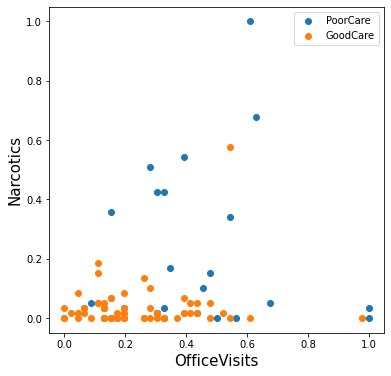

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
plt.scatter(X_train[np.where(y_train.values==1),0], X_train[np.where(y_train.values==1),1], label='PoorCare')
plt.scatter(X_train[np.where(y_train.values==0),0], X_train[np.where(y_train.values==0),1], label='GoodCare')
plt.legend()
plt.xlabel('OfficeVisits',fontdict={'size':15})
plt.ylabel('Narcotics',fontdict={'size':15})
plt.show()

To build SVM model, we need the package `svm`. Let us load it (import it by yourself).

In [12]:
from sklearn import svm

Function `svm.SVC` is used to fit a SVM model. Here we still use the formula: PoorCare ~ OfficeVisits + Narcotics. The first argument indicate the kernel function used to train the model, We first try the linear SVM; Argument `C` is regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

In [13]:
svm1=svm.SVC(kernel='linear', C=100) 
svm1.fit(X_train,y_train.ravel()) #ravel:Return a contiguous flattened array.

C:\Users\la22484\AppData\Local\Temp\ipykernel_20624\1008923478.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svm1.fit(X_train,y_train.ravel()) #ravel:Return a contiguous flattened array.


SVC(C=100, kernel='linear')

List the support vectors by `clf.support_`:

In [14]:
svm1.support_

array([15, 18, 23, 32, 34, 35, 38, 45, 46, 47, 52, 54, 56, 57, 60, 66, 67,
       70, 76, 81, 87,  1,  2, 16, 24, 29, 30, 31, 33, 37, 39, 41, 43, 49,
       59, 71, 74, 75, 78, 80, 86])

In [15]:
#number of support vectors for each class.
svm1.n_support_

array([21, 20])

In [16]:
#plot
#define the range
x1_min, x1_max = X_train[:,0].min(), X_train[:,0].max() #range for x1
x2_min, x2_max = X_train[:,1].min(), X_train[:,1].max() #range for x2

#generate sampling points
x1,x2=np.mgrid[x1_min:x1_max:80j, x2_min:x2_max:80j ] 
grid_train=np.stack((x1.flat,x2.flat), axis=1) #stack: Join a sequence of arrays
#predict the category
grid_hat = svm1.predict(grid_train) 
grid_hat = grid_hat.reshape(x1.shape)  

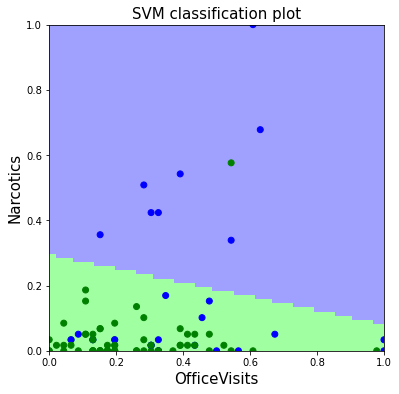

In [17]:
import matplotlib
#set color
cm_light=matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark=matplotlib.colors.ListedColormap(['g','r','b'] )

plt.figure(figsize=(6,6))
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, shading='auto') # show predictions
plt.scatter(X_train[:,0], X_train[:,1], c=y_train.values, cmap=cm_dark)  # show sample
plt.xlabel('OfficeVisits', fontsize=15)
plt.ylabel('Narcotics', fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('SVM classification plot', fontsize= 15)
plt.show()

### Cost Parameter
Let us change to a smaller value of the cost parameter:

In [18]:
svm2=svm.SVC(kernel='linear', C=1) 
svm2.fit(X_train,y_train.ravel())

C:\Users\la22484\AppData\Local\Temp\ipykernel_20624\2146416390.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svm2.fit(X_train,y_train.ravel())


SVC(C=1, kernel='linear')

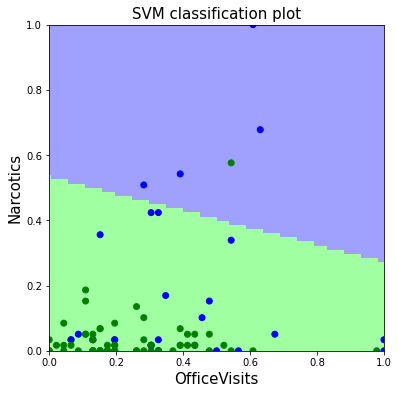

In [19]:
grid_hat = svm2.predict(grid_train)      
grid_hat = grid_hat.reshape(x1.shape)  

plt.figure(figsize=(6,6))
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, shading='auto')     
plt.scatter(X_train[:,0], X_train[:,1],c=y_train.values, cmap=cm_dark)  
plt.xlabel('OfficeVisits', fontsize=15)
plt.ylabel('Narcotics', fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('SVM classification plot', fontsize= 15)
plt.show()

Softer margin? Let us check the support vectors.

In [20]:
svm2.support_

array([15, 18, 23, 27, 32, 34, 35, 38, 45, 46, 47, 52, 54, 56, 57, 60, 65,
       66, 67, 70, 76, 77, 81, 85, 87,  1,  2,  6, 16, 20, 24, 29, 30, 31,
       33, 37, 39, 41, 43, 49, 59, 63, 71, 74, 75, 78, 80, 84, 86])

In [21]:
svm2.n_support_

array([25, 24])

We have more support vectors.

### Kernel
Let us change to a RBF kernel:

gamma can be regarded as the inverse of the sigma: exp(-gamma|x-z|^2)

C:\Users\la22484\AppData\Local\Temp\ipykernel_20624\328705108.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svm3.fit(X_train,y_train.ravel())


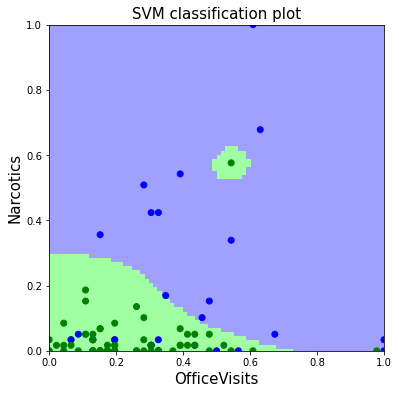

In [22]:
svm3=svm.SVC(kernel='rbf', C=100, gamma=5) 
svm3.fit(X_train,y_train.ravel())

grid_hat = svm3.predict(grid_train)       
grid_hat = grid_hat.reshape(x1.shape)  

plt.figure(figsize=(6,6))
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, shading='auto')     
plt.scatter(X_train[:,0], X_train[:,1],c=y_train.values, cmap=cm_dark)  
plt.xlabel('OfficeVisits', fontsize=15)
plt.ylabel('Narcotics', fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('SVM classification plot', fontsize= 15)
plt.show()

Let us change to a smaller value of the cost parameter:

C:\Users\la22484\AppData\Local\Temp\ipykernel_20624\2408814723.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svm4.fit(X_train,y_train.ravel())


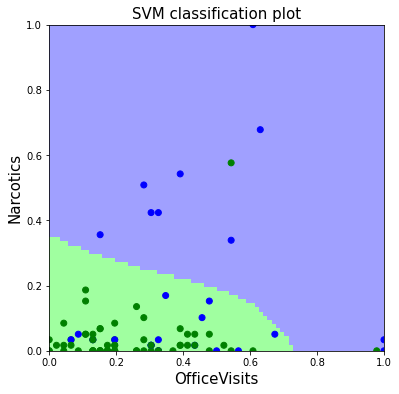

In [23]:
svm4=svm.SVC(kernel='rbf', C=1, gamma=5) 
svm4.fit(X_train,y_train.ravel())

grid_hat = svm4.predict(grid_train)       
grid_hat = grid_hat.reshape(x1.shape)  

plt.figure(figsize=(6,6))
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, shading='auto')     
plt.scatter(X_train[:,0], X_train[:,1],c=y_train.values, cmap=cm_dark)  
plt.xlabel('OfficeVisits', fontsize=15)
plt.ylabel('Narcotics', fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('SVM classification plot', fontsize= 15)
plt.show()

More on kernel and parameters can be found by `help(svm)`

## 8 In-Sample Cross Validation(SVM Model)

`GridSearchCV` function can help us tune the parameters like cost, kernel, gamma etc from a set of choices. It may take a lot of time.


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = [
        {'kernel': ['linear'], 'C': [0.5, 1, 10, 100]},
        {'kernel': ['poly'], 'C': [0.5, 1, 10, 100], 'degree': [2, 3]},
        {'kernel': ['rbf'], 'C': [0.5, 1, 10, 100], 'gamma':[ 5, 3, 1, 0.5, 0.3]}
        ]
svm_valid=GridSearchCV(svm.SVC(),parameters) #by default cv=3
svm_valid.fit(X_train,y_train)
print(svm_valid.best_estimator_)

SVC(C=10, kernel='linear')


Plot the best model:

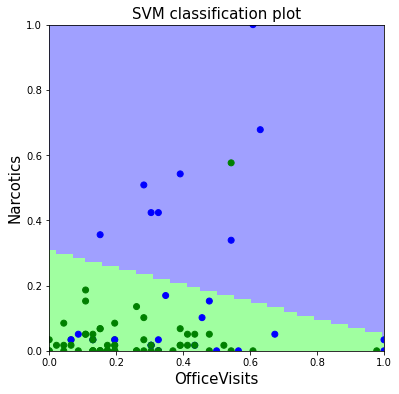

In [26]:
grid_hat = svm_valid.predict(grid_train)    
grid_hat = grid_hat.reshape(x1.shape)  

plt.figure(figsize=(6,6))
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, shading='auto')    
plt.scatter(X_train[:,0], X_train[:,1],c=y_train.values, cmap=cm_dark)  
plt.xlabel('OfficeVisits', fontsize=15)
plt.ylabel('Narcotics', fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('SVM classification plot', fontsize= 15)
plt.show()

And we get the following confusion matrix with the best model.

In [27]:
predictTrain =svm_valid.predict(X_train)
conf1 = pd.crosstab(index = y_train,  
columns=predictTrain, colnames=['predictTrain'])
conf1

predictTrain,0,1
PoorCare,,
0,65,1
1,17,8


The in-sample accuracy is 73/91=80.22%.

## 9 Out-of-Sample Model Testing(SVM Model)

Similarly, we can perform the out-of-sample test for our model using the test data set. We firstly plot the data in test set:

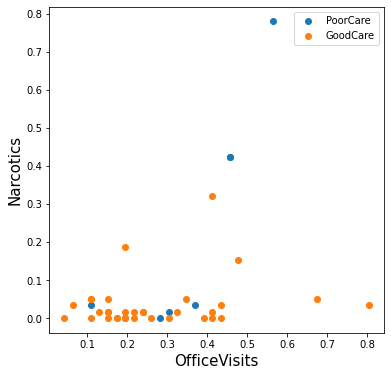

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(X_test[np.where(y_test.values==1),0], X_test[np.where(y_test.values==1),1], label='PoorCare')
plt.scatter(X_test[np.where(y_test.values==0),0], X_test[np.where(y_test.values==0),1], label='GoodCare')
plt.legend()
plt.xlabel('OfficeVisits',fontdict={'size':15})
plt.ylabel('Narcotics',fontdict={'size':15})
plt.show()

And we get the following confusion matrix with the best model for new prediction.

In [29]:
predictTest = svm_valid.predict(X_test)
conf2 = pd.crosstab(index = y_test,  
columns=predictTest, colnames=['predictTest'])
conf2

predictTest,0,1
PoorCare,,
0,31,1
1,5,3


The out-of-sample accuracy of the best model is 34/40=85%, which is higher than the logistic regression model (accuracy is 75% with threshold 0.3).